* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [3]:
# df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df = pd.read_excel("data/Online Retail.xlsx")
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.describe(include=np.object)

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

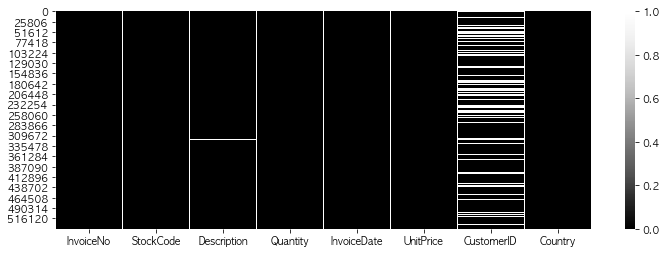

In [11]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cmap="Greys_r")

In [12]:
df["totalPrice"] = df["Quantity"] * df["UnitPrice"]

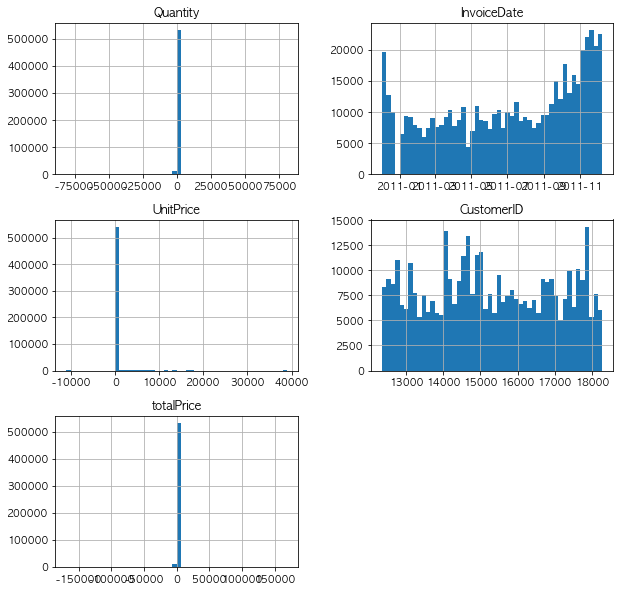

In [13]:
_ = df.hist(figsize=(10, 10), bins=50)

In [14]:
df.loc[df["CustomerID"].isnull(), "Country"].value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [15]:
df.loc[df["CustomerID"].notnull(), "Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [16]:
df["id_null"] = df["CustomerID"].isnull()

In [17]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False


In [18]:
# 매출액 상위 10개 국가
top_sale_country = df.groupby("Country")["totalPrice"].agg(["mean", "sum"]).sort_values("sum", ascending=False).head(10)
top_sale_country

,mean,sum
Country,,
United Kingdom,16.525065,8187806.364
Netherlands,120.059696,284661.540
EIRE,32.122599,263276.820
Germany,23.348943,221698.210
France,23.069288,197403.900
Australia,108.877895,137077.270
Switzerland,28.164510,56385.350
Spain,21.624390,54774.580
Belgium,19.773301,40910.960


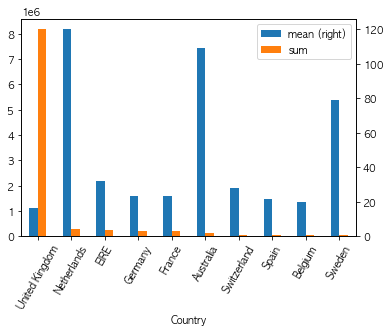

In [19]:
top_sale_country.plot.bar(secondary_y="mean", rot=60)

## 고객별 구매 취소 비율

In [20]:
df["Cancel"] = df["Quantity"] < 0

In [21]:
cancel_customer = df.groupby(["CustomerID", "Cancel"])["InvoiceNo"].count().unstack()
cancel_customer["cancel_ratio"] = (cancel_customer[True] / cancel_customer[False]) * 100
cancel_customer.sort_values(True, ascending=False).head(10)

Cancel,False,True,cancel_ratio
CustomerID,,,
14911.0,5677.0,226.0,3.980976
17841.0,7847.0,136.0,1.733146
17511.0,963.0,113.0,11.734164
15311.0,2379.0,112.0,4.707860
12607.0,101.0,101.0,100.000000
14410.0,194.0,93.0,47.938144
13798.0,349.0,90.0,25.787966
14606.0,2700.0,82.0,3.037037
13113.0,201.0,79.0,39.303483


### 구매 취소 건 조회

In [22]:
df[df["CustomerID"] == 14911]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice,id_null,Cancel
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,39.8,False,False
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,17.7,False,False
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,15.3,False,False
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,42.5,False,False
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,13.5,False,False
...,...,...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0,False,False
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,False,False
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,False,False
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,False,False


### 제품별 구매 취소 비율

In [23]:
cancel_stock = df.groupby(["StockCode", "Cancel"])["InvoiceNo"].count().unstack()
cancel_stock["cancel_ratio"] = (cancel_stock[True] / cancel_stock[False]) * 100
cancel_stock.sort_values(True, ascending=False).head(10)

Cancel,False,True,cancel_ratio
StockCode,,,
M,327.0,244.0,74.617737
22423,2019.0,184.0,9.113422
POST,1130.0,126.0,11.150442
22960,1142.0,87.0,7.618214
D,NaN,77.0,NaN
22720,1401.0,76.0,5.424697
S,2.0,61.0,3050.000000
21232,843.0,61.0,7.236062
22699,1084.0,54.0,4.981550


### 국가별 구매 취소 비율

In [24]:
cancel_country = df.groupby(["Country", "Cancel"])["InvoiceNo"].count().unstack()
cancel_country["cancel_ratio"] = (cancel_country[True] / cancel_country[False]) * 100
cancel_country.sort_values(True, ascending=False).head(10)

Cancel,False,True,cancel_ratio
Country,,,
United Kingdom,486286.0,9192.0,1.890246
Germany,9042.0,453.0,5.009954
EIRE,7894.0,302.0,3.825690
France,8408.0,149.0,1.772122
USA,179.0,112.0,62.569832
Australia,1185.0,74.0,6.244726
Spain,2485.0,48.0,1.931590
Italy,758.0,45.0,5.936675
Belgium,2031.0,38.0,1.871000


## 날짜와 시간

In [25]:
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek

In [26]:
df["InvoiceDayname"] = df["InvoiceDate"].dt.day_name()

In [27]:
df["InvoiceYM"] = df["InvoiceDate"].astype(str).str[:7]

In [28]:
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour

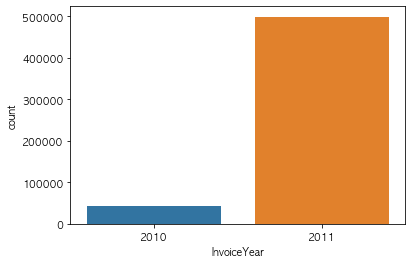

In [29]:
sns.countplot(data=df, x="InvoiceYear")

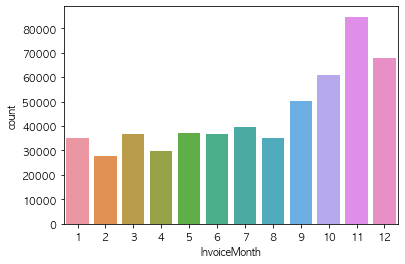

In [30]:
sns.countplot(data=df, x="InvoiceMonth")

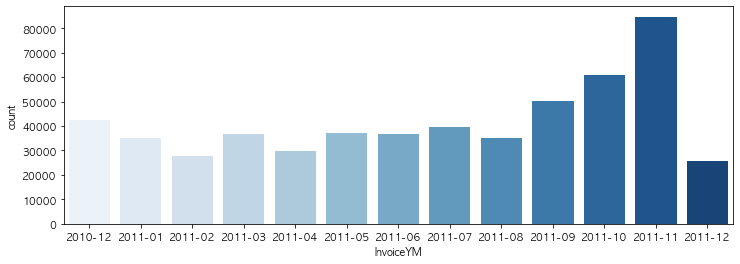

In [31]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceYM", palette="Blues")

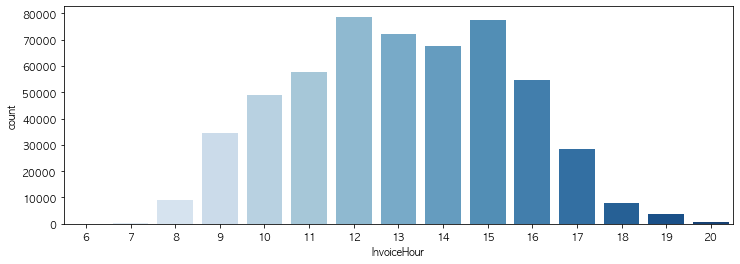

In [32]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceHour", palette="Blues")

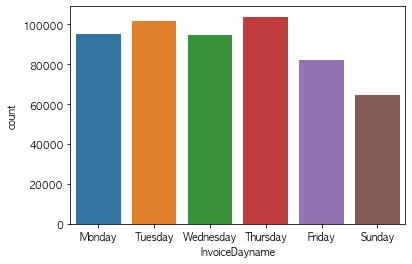

In [33]:
sns.countplot(data=df.sort_values("InvoiceDow"), x="InvoiceDayname")

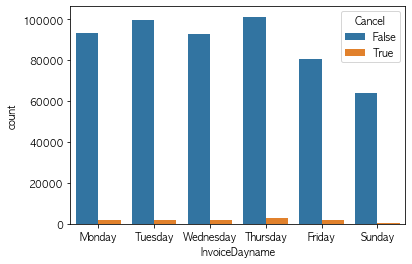

In [34]:
sns.countplot(data=df.sort_values("InvoiceDow"), x="InvoiceDayname", hue="Cancel")

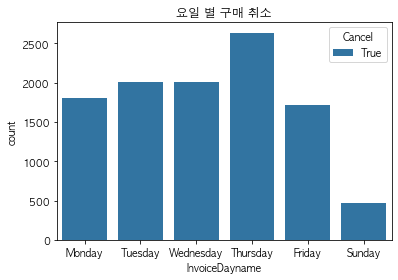

In [35]:
plt.title("요일 별 구매 취소")
sns.countplot(data=df[df["Cancel"]].sort_values("InvoiceDow"), x="InvoiceDayname", hue="Cancel")

In [36]:
[w for w in "월화수목금토일"]

['월', '화', '수', '목', '금', '토', '일']

In [37]:
order_hour_dow = pd.crosstab(df["InvoiceHour"], df["InvoiceDow"])
# 데이터에 토요일이 없음
order_hour_dow.columns = [w for w in "월화수목금일"]
order_hour_dow.style.background_gradient()

,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


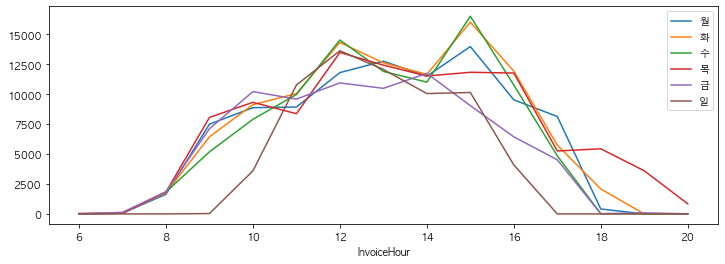

In [38]:
order_hour_dow.plot(figsize=(12, 4))

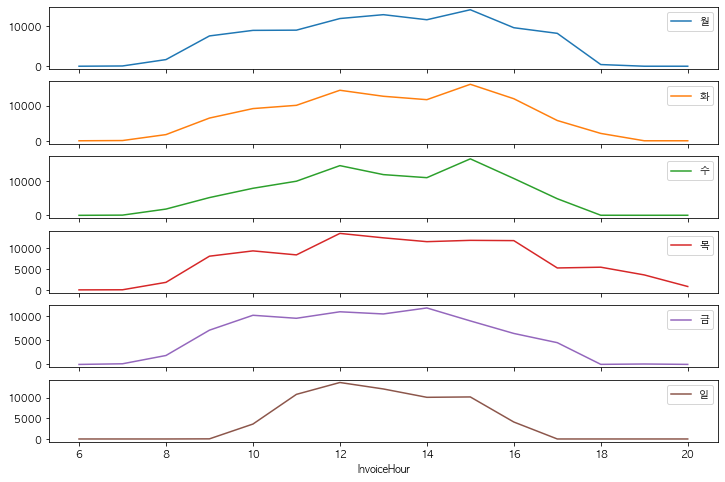

In [39]:
_ = order_hour_dow.plot(figsize=(12, 8), subplots=True)

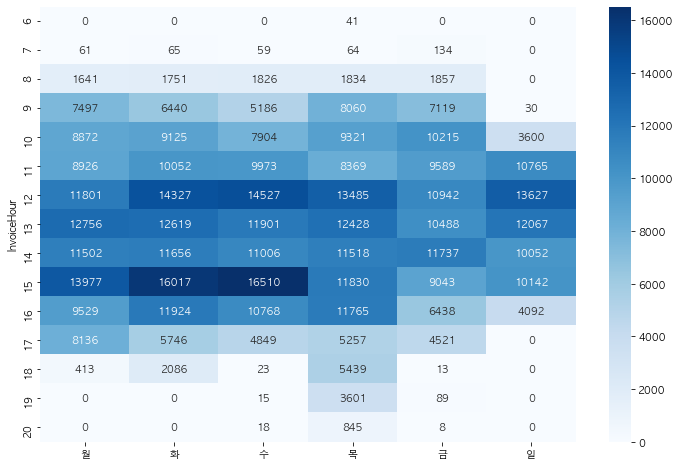

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(order_hour_dow, annot=True, fmt=".0f", cmap="Blues")

## 고객

In [41]:
# 전체 고객수, 고객 한 명당 평균 구매 횟수
cust_count = df[~df["Cancel"]].groupby(["CustomerID"])["InvoiceNo"].count()
cust_count.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: InvoiceNo, dtype: float64

In [42]:
df_cust_count = cust_count.to_frame(name="count")

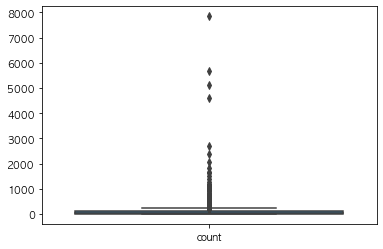

In [43]:
sns.boxplot(data=df_cust_count)

## 고객ID가 없는 주문과 취소 주문은 전체 데이터에서 제외

In [44]:
df.shape

(541909, 19)

In [45]:
df = df[~df["Cancel"] & df["CustomerID"].notnull()].copy()
df.shape

(397924, 19)

In [46]:
def get_month_day1(x): return dt.datetime(x.year, x.month, 1)

In [47]:
df["InvoiceDate1"] = df["InvoiceDate"].map(get_month_day1)

In [48]:
grouping = df.groupby('CustomerID')['InvoiceDate1']
grouping.transform('min')

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: InvoiceDate1, Length: 397924, dtype: datetime64[ns]

In [49]:
df["InvoiceDateMin"] = df.groupby('CustomerID')['InvoiceDate1'].transform('min')

In [50]:
year_diff = df["InvoiceDate1"].dt.year - df["InvoiceDateMin"].dt.year
month_diff = df["InvoiceDate1"].dt.month - df["InvoiceDateMin"].dt.month

In [51]:
df["CohortIndex"] = year_diff * 12 + month_diff + 1

In [52]:
df["CohortIndex"].value_counts()

1     118764
2      27868
4      27256
3      26991
6      26964
5      25426
7      23705
8      23604
12     23457
10     23230
9      23011
11     20394
13      7254
Name: CohortIndex, dtype: int64

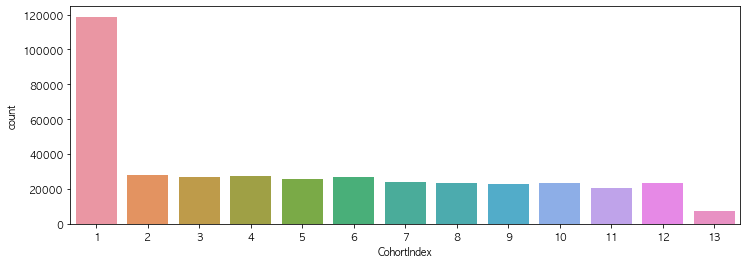

In [55]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="CohortIndex")

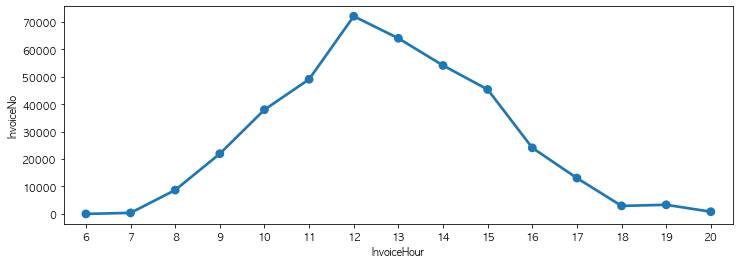

In [59]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="InvoiceHour", y="InvoiceNo", estimator=len, ci=None)

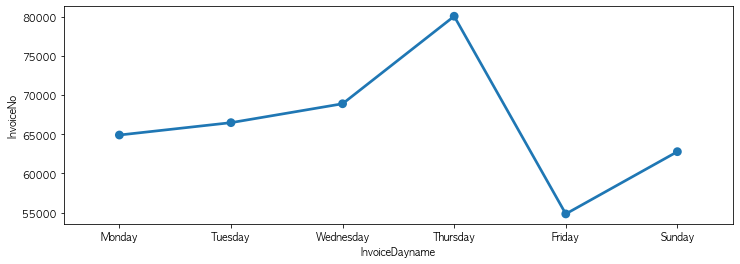

In [62]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=df.sort_values("InvoiceDow"), x="InvoiceDayname", y="InvoiceNo", estimator=len, ci=None)

In [79]:
cohort_count = df.groupby(["InvoiceDateMin", "CohortIndex"])["InvoiceNo"].count().unstack()
cohort_count.index = cohort_count.index.astype(str)
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,26160.0,10191.0,8777.0,11268.0,9728.0,12055.0,11191.0,11428.0,11417.0,14232.0,13545.0,22086.0,7254.0
2011-01-01,11041.0,2220.0,3039.0,2314.0,3627.0,3243.0,2793.0,2880.0,3793.0,5056.0,6398.0,1371.0,NaN
2011-02-01,8931.0,1412.0,1935.0,2505.0,2278.0,2027.0,2248.0,2740.0,2981.0,2946.0,451.0,NaN,NaN
2011-03-01,11458.0,1429.0,2609.0,2384.0,2445.0,2115.0,2962.0,3579.0,4297.0,996.0,NaN,NaN,NaN
2011-04-01,7238.0,1405.0,1287.0,1301.0,1364.0,2038.0,1904.0,2186.0,523.0,NaN,NaN,NaN,NaN
2011-05-01,6121.0,1090.0,917.0,917.0,1509.0,2357.0,1980.0,791.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,5712.0,924.0,714.0,1528.0,1762.0,2603.0,627.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4992.0,501.0,1333.0,1368.0,1814.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,4857.0,1600.0,2849.0,2804.0,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


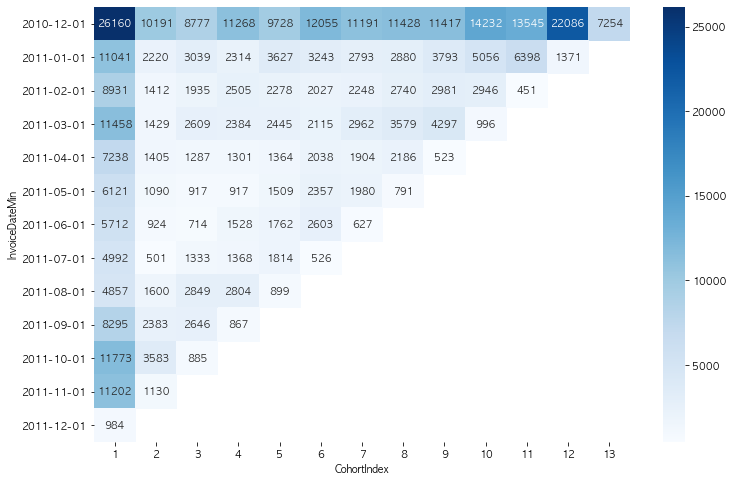

In [91]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot=True, fmt=".0f", cmap="Blues")

In [105]:
cohort_ratio = cohort_count.div(cohort_count.iloc[:, 0], axis=0).round(2) * 100
cohort_ratio

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,100.0,39.0,34.0,43.0,37.0,46.0,43.0,44.0,44.0,54.0,52.0,84.0,28.0
2011-01-01,100.0,20.0,28.0,21.0,33.0,29.0,25.0,26.0,34.0,46.0,58.0,12.0,NaN
2011-02-01,100.0,16.0,22.0,28.0,26.0,23.0,25.0,31.0,33.0,33.0,5.0,NaN,NaN
2011-03-01,100.0,12.0,23.0,21.0,21.0,18.0,26.0,31.0,38.0,9.0,NaN,NaN,NaN
2011-04-01,100.0,19.0,18.0,18.0,19.0,28.0,26.0,30.0,7.0,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.0,15.0,15.0,25.0,39.0,32.0,13.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,16.0,12.0,27.0,31.0,46.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,10.0,27.0,27.0,36.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,33.0,59.0,58.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


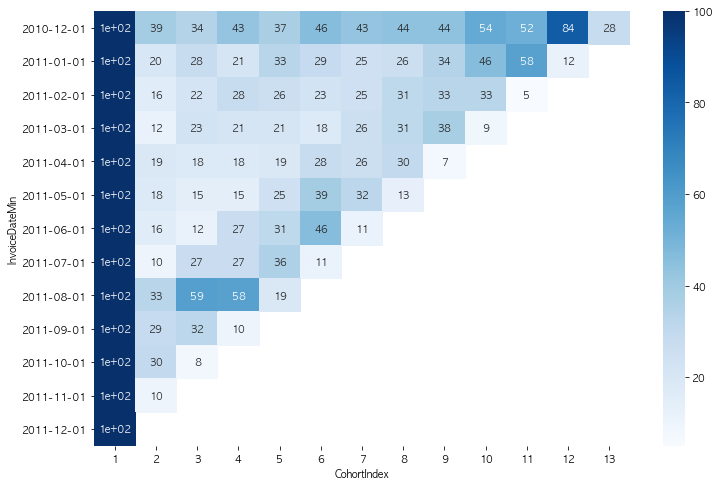

In [106]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_ratio, annot=True, cmap="Blues")